Low temperature Electrolysis: 1 kg/h H2 = 70 kWe

Theoretical value = 39.45 kWe

Hight temperature Electrolysis(1050K=780C): 1 kg/h H2 = 51.02 kWe + 10.66 kWth

Theoretical value = 33.72 kWe

https://www1.eere.energy.gov/solar/pdfs/doctor.pdf

100 SLPH H2. Standard liter T=0C, P=1bar, rho = 0.088 kg/m3
100 SL * 1e-3 * 0.088 = 8.8 g

https://www.hydrogen.energy.gov/pdfs/review05/pd24_herring.pdf


In [3]:
def SLPH_to_kgph(quant):
    # [standard liter/h to kg/h]
    return quant*1e-3*0.088

SLPH_to_kgph(100)

0.0088

600 MWth gas cooled reactor could produce 2.5 kg/s of H2.

https://www.energy.gov/sites/prod/files/2014/08/f18/fcto_2014_electrolytic_h2_wkshp_obrien1.pdf

In [4]:
def SCFD_to_kgph(quant):
    # [standard cft/d to kg/s]
    return quant/35.3147/3600/24*0.088

SCFD_to_kgph(85e6)

2.4515024642450327

https://pubs.rsc.org/en/content/articlelanding/2008/jm/b718822f/unauth#!divAbstract

https://www.sciencedirect.com/science/article/pii/S0378775311024384

https://www.sciencedirect.com/science/article/pii/S0149197007001709

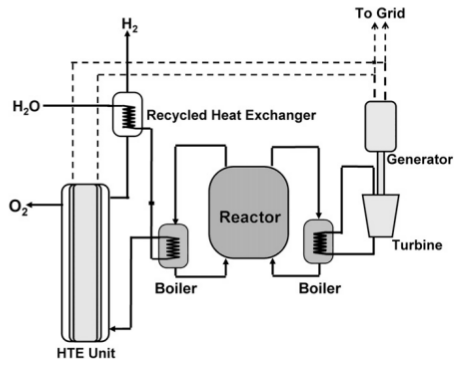

In [1]:
from IPython.display import Image
Image(filename='figures/hte.png')

Have to download it at the office
https://www.sciencedirect.com/science/article/abs/pii/0360319988900523

$\Delta$G (25$^\circ$C) = 1.23 eV = 237 kJ/mol

$\Delta$G (900$^\circ$C) = 0.95 eV = 183 kJ/mol

$\Delta$H (900$^\circ$C) = 1.3 eV = 249 kJ/mol

http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

[241.66666666666666, 234.33333333333334, 227.0, 219.66666666666666, 212.33333333333334, 205.0, 197.66666666666666, 190.33333333333334]


Text(0.5, 0, 'Temperature [$^\\circ$C]')

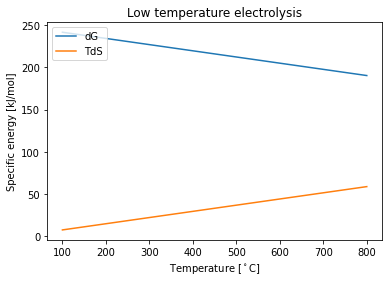

In [4]:
import numpy as np
import matplotlib.pyplot as plt

g900 = 183
h900 = 249

# h = g + T.s
Ts900 = h900-g900
T = 900
s900 = Ts900/T

dg_T = []
tds_T = []
temp = [100, 200, 300, 400, 500, 600, 700, 800]
for T in temp:
    dg_T.append(h900-T*s900)
    tds_T.append(T*s900)

print(dg_T)
plt.plot(temp, dg_T, label='dG')
plt.plot(temp, tds_T, label='TdS')

plt.legend(loc="upper left")
plt.title('Low temperature electrolysis')
plt.ylabel('Specific energy [kJ/mol]')
plt.xlabel('Temperature [$^\circ$C]')

According to that plot dG, is 241 for 100C, which is higher than dG at room temperature, which is not correct.

https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf

26.041666666666664
24.11265432098765


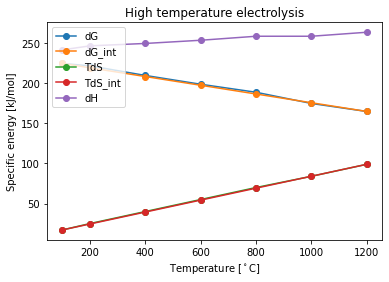

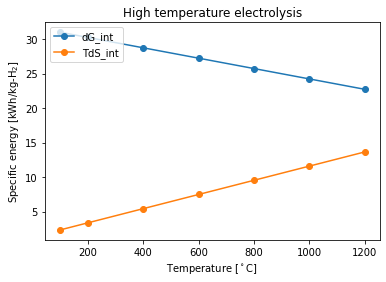

<Figure size 432x288 with 0 Axes>

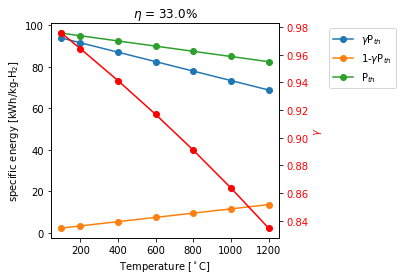

<Figure size 432x288 with 0 Axes>

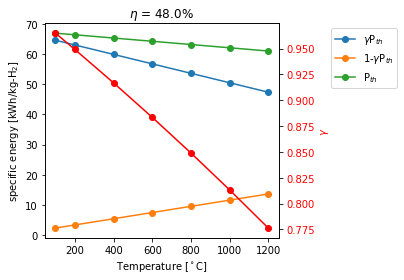

In [10]:
dg_T = [225, 222, 210, 199, 189, 175, 165]
tds_T = [17, 25, 40, 55, 70, 84, 99]
temp = [100, 200, 400, 600, 800, 1000, 1200]

dg_int = [(dg_T[-1]-dg_T[0])/(temp[-1]-temp[0])*(T-temp[0])+dg_T[0] for T in temp]
tds_int = [(tds_T[-1]-tds_T[0])/(temp[-1]-temp[0])*(T-temp[0])+tds_T[0] for T in temp]

print(np.interp(800, temp, dg_T)/3600/2/1.008/1e-3)
print(np.interp(1000, temp, dg_T)/3600/2/1.008/1e-3)

plt.figure(1)
plt.plot(temp, dg_T, label='dG', marker='o')
plt.plot(temp, dg_int, label='dG_int', marker='o')
plt.plot(temp, tds_T, label='TdS', marker='o')
plt.plot(temp, tds_int, label='TdS_int', marker='o')
plt.plot(temp, np.array(dg_T)+np.array(tds_T), label='dH', marker='o')
plt.legend(loc="upper left")
plt.title('High temperature electrolysis')
plt.ylabel('Specific energy [kJ/mol]')
plt.xlabel('Temperature [$^\circ$C]')

dg_int = np.array(dg_int)/3600/2/1.008/1e-3
tds_int = np.array(tds_int)/3600/2/1.008/1e-3

plt.figure(2)
plt.plot(temp, dg_int, label='dG_int', marker='o')
plt.plot(temp, tds_int, label='TdS_int', marker='o')
plt.legend(loc="upper left")
plt.title('High temperature electrolysis')
plt.ylabel('Specific energy [kWh/kg-H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')

# HTE 2 (no steam temperature boosting) \eta = 33%
eta = 0.33 # thermal-to-electrical energy conversion efficiency
etagammaPth = dg_int  # \eta * \gamma * P_{th}
gammacPth = tds_int  # gamma comp = (1-\gamma) * P_{th}

gammaPth = etagammaPth/eta
Pth1 = gammaPth + gammacPth  # P_{th}
gamma1 = gammaPth/Pth1  # \gamma

plt.figure(3)
fig, ax1 = plt.subplots()
ax1.plot(temp, gammaPth, label='$\gamma$P$_{th}$', marker='o')
ax1.plot(temp, gammacPth, label='1-$\gamma$P$_{th}$', marker='o')
ax1.plot(temp, Pth1, label='P$_{th}$', marker='o')
ax1.legend(loc="upper left", bbox_to_anchor=(1.2, 1.0), fancybox=True)
ax1.set_title("$\eta$ = {0}%".format(eta*100), color="black")
ax1.set_ylabel("specific energy [kWh/kg-H$_2$]", color="black")
ax1.set_xlabel("Temperature [$^\circ$C]")
ax2 = ax1.twinx()
ax2.plot(temp, gamma1, color='red', marker="o")
ax2.set_ylabel('$\gamma$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()
plt.show()

# HTE 2 (no steam temperature boosting) \eta = 48%
eta = 0.48 # thermal-to-electrical energy conversion efficiency
etagammaPth = dg_int  # \eta * \gamma * P_{th}
gammacPth = tds_int  # gamma comp = (1-\gamma) * P_{th}

gammaPth = etagammaPth/eta
Pth2 = gammaPth + gammacPth  # P_{th}
gamma2 = gammaPth/Pth2  # \gamma

plt.figure(4)
fig, ax1 = plt.subplots()
ax1.plot(temp, gammaPth, label='$\gamma$P$_{th}$', marker='o')
ax1.plot(temp, gammacPth, label='1-$\gamma$P$_{th}$', marker='o')
ax1.plot(temp, Pth2, label='P$_{th}$', marker='o')
ax1.legend(loc="upper left", bbox_to_anchor=(1.2, 1.0), fancybox=True)
ax1.set_title("$\eta$ = {0}%".format(eta*100), color="black")
ax1.set_ylabel("specific energy [kWh/kg-H$_2$]", color="black")
ax1.set_xlabel("Temperature [$^\circ$C]")
ax2 = ax1.twinx()
ax2.plot(temp, gamma2, color='red', marker="o")
ax2.set_ylabel('$\gamma$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()
plt.show()

Steam Temperature =  665.0
Steam Temperature =  807.5


Text(0.5, 0, 'Power [MW$_{th}$]')

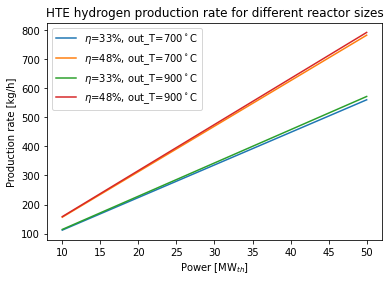

In [17]:
outT = 700  # Reactor outlet temperature
T = 0.95*outT  # We consider that the steam temperature is 95% of the reactor outlet temperature
print("Steam Temperature = ", T)

Pth700_33 = np.interp(T, temp, Pth1)
Pth700_48 = np.interp(T, temp, Pth2)

outT = 850  # Reactor outlet temperature
T = 0.95*outT  # We consider that the steam temperature is 95% of the reactor outlet temperature
print("Steam Temperature = ", T)

Pth900_33 = np.interp(T, temp, Pth1)
Pth900_48 = np.interp(T, temp, Pth2)

power = [10, 20, 30, 40, 50]  #thermal  
# [MW]*1e3kW/MW/[kWh/kg-H2] = kg-H2/h
prate1 = [(P*1e3/Pth700_33) for P in power]  # kg-H2/h
prate2 = [(P*1e3/Pth700_48) for P in power]  # kg-H2/h
prate3 = [(P*1e3/Pth900_33) for P in power]  # kg-H2/h
prate4 = [(P*1e3/Pth900_48) for P in power]  # kg-H2/h

plt.plot(power, prate1, label='$\eta$=33%, out_T=700$^\circ$C')
plt.plot(power, prate2, label='$\eta$=48%, out_T=700$^\circ$C')
plt.plot(power, prate3, label='$\eta$=33%, out_T=900$^\circ$C')
plt.plot(power, prate4, label='$\eta$=48%, out_T=900$^\circ$C')
plt.legend(loc="upper left")
plt.title('HTE hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')


In [ ]:
see hotelly paper